# Inbouned and Demonestic

## Libraries

In [35]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller


## domenstic data 

In [2]:
# domenstic data 
## read data file
df_d = pd.read_excel('raw_data/D_data.xlsx')

## crete date column and set it as index then drop the (yeaer month) columns
df_d['Date'] = pd.to_datetime(df_d['Year'].astype(str) + ' ' + df_d['Month'])
df_d.set_index('Date', inplace=True)
df_d.drop(columns=['Year', 'Month'], inplace=True)

## rename the column
df_d.rename(columns={'Tourists Number Overnight Visitors': 'number of visitor'}, inplace=True)
df_d.head()

/var/folders/kb/gc9pqtqx4lz2rj1xp776bfxm0000gn/T/ipykernel_67896/142961181.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_d['Date'] = pd.to_datetime(df_d['Year'].astype(str) + ' ' + df_d['Month'])


,number of visitor,Overnight Stay,Tourists Spending,Average Length of Stay,Avergae Spending per Trip,Average Spending per Night,Religious,Leisure,Business,Visiting Friends and Relatives,...,Apartments,Private,Other,ACCOMMODATION SPEND in MILLION SAR,ENTERTAINMENT SPEND in MILLION SAR,FOOD SPENDS in MILLION SAR,LOCAL TRANSPORT SPENDS in MILLION SAR,SHOPPING SPEND in MILLION SAR,OTHER SPEND in MILLION SAR,TOTAL SPENDS in MILLION SAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,4823.334549,23103.710191,4381.208200,4.789987,908.335956,189.632235,1194.967621,1854.266758,169.023621,1380.924648,...,1549.630667,1335.232156,93.080369,1362.0,399.0,935.0,618.0,1005.0,62.0,4381.0
2015-02-01,4140.102538,20036.521049,3581.202822,4.839620,865.003412,178.733764,952.743784,1620.487517,165.280324,1185.084843,...,1495.705370,1139.172444,137.152216,1059.0,371.0,784.0,513.0,734.0,119.0,3581.0
2015-03-01,3859.551814,18428.539996,3405.944481,4.774788,882.471501,184.819008,934.119103,1674.931990,178.188045,851.654513,...,1607.740641,861.592916,126.839058,1010.0,359.0,754.0,476.0,713.0,94.0,3406.0
2015-04-01,3539.225495,15996.654930,3317.223238,4.519818,937.273775,207.369807,674.581187,1592.922992,202.923651,895.586948,...,2217.786467,860.645616,8.295148,785.0,373.0,686.0,458.0,852.0,162.0,3317.0
2015-05-01,3332.502920,15393.351631,3450.324841,4.619156,1035.355384,224.143833,726.238191,1410.867067,201.985253,768.996769,...,2111.083467,644.062810,18.217357,856.0,328.0,652.0,489.0,857.0,269.0,3450.0


In [3]:
# drop nan
df_d = df_d.dropna()
df_d

,number of visitor,Overnight Stay,Tourists Spending,Average Length of Stay,Avergae Spending per Trip,Average Spending per Night,Religious,Leisure,Business,Visiting Friends and Relatives,...,Apartments,Private,Other,ACCOMMODATION SPEND in MILLION SAR,ENTERTAINMENT SPEND in MILLION SAR,FOOD SPENDS in MILLION SAR,LOCAL TRANSPORT SPENDS in MILLION SAR,SHOPPING SPEND in MILLION SAR,OTHER SPEND in MILLION SAR,TOTAL SPENDS in MILLION SAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,4823.334549,23103.710191,4381.208200,4.789987,908.335956,189.632235,1194.967621,1854.266758,169.023621,1380.924648,...,1549.630667,1335.232156,93.080369,1362.000000,399.000000,935.000000,618.000000,1005.000000,62.000000,4381.000000
2015-02-01,4140.102538,20036.521049,3581.202822,4.839620,865.003412,178.733764,952.743784,1620.487517,165.280324,1185.084843,...,1495.705370,1139.172444,137.152216,1059.000000,371.000000,784.000000,513.000000,734.000000,119.000000,3581.000000
2015-03-01,3859.551814,18428.539996,3405.944481,4.774788,882.471501,184.819008,934.119103,1674.931990,178.188045,851.654513,...,1607.740641,861.592916,126.839058,1010.000000,359.000000,754.000000,476.000000,713.000000,94.000000,3406.000000
2015-04-01,3539.225495,15996.654930,3317.223238,4.519818,937.273775,207.369807,674.581187,1592.922992,202.923651,895.586948,...,2217.786467,860.645616,8.295148,785.000000,373.000000,686.000000,458.000000,852.000000,162.000000,3317.000000
2015-05-01,3332.502920,15393.351631,3450.324841,4.619156,1035.355384,224.143833,726.238191,1410.867067,201.985253,768.996769,...,2111.083467,644.062810,18.217357,856.000000,328.000000,652.000000,489.000000,857.000000,269.000000,3450.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,7376.762000,38723.892000,9700.795968,5.249443,1315.050000,250.510000,904.147000,633.757000,3272.462000,282.480000,...,2414.438000,454.876000,2396.094000,2062.639464,443.996345,3069.976821,2671.476742,1124.294063,328.412532,9700.795968
2024-03-01,6899.089000,45658.842000,10201.575868,6.618097,1478.680000,223.430000,1589.621000,570.008000,2199.798000,270.523000,...,2224.439000,323.697000,2323.733000,1979.171953,345.852615,3364.201415,3208.844557,997.548042,305.957286,10201.575868
2024-04-01,7949.589000,45720.502000,9223.160569,5.751304,1160.210000,201.730000,1182.455000,689.091000,2870.370000,254.734000,...,2368.010000,293.559000,3156.966000,1969.310708,338.646384,3183.198718,2741.695411,732.287238,258.022109,9223.160569


In [4]:
visitor_num_d = pd.DataFrame(df_d['number of visitor'])
spend_d = pd.DataFrame(df_d['Tourists Spending'])
spend_d.tail(12)

,Tourists Spending
Date,
2023-07-01,11260.809963
2023-08-01,8626.758304
2023-09-01,8308.885309
2023-10-01,9069.909925
2023-11-01,10769.216526
2023-12-01,9119.986237
2024-01-01,9497.673722
2024-02-01,9700.795968
2024-03-01,10201.575868


## data visualizing

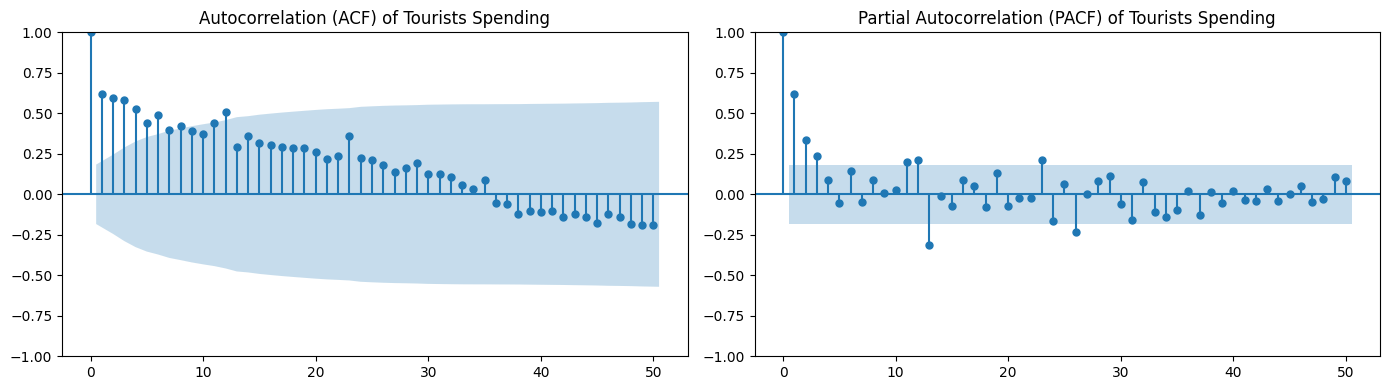

In [25]:
# ACF & PACF plots to understand correlation and seasonality for 'Tourists Spending'

# These plots help us understand how tourist spending is related to its own past values.
# ACF shows the correlation with previous months.
# PACF helps identify the order of the AR (AutoRegressive) component for modeling.


# Adjust figure size and subplot layout
fig, ax = plt.subplots(1, 2, figsize=(14, 4))

# ACF plot
plot_acf(spend_d, lags=50, ax=ax[0])
ax[0].set_title('Autocorrelation (ACF) of Tourists Spending')

# PACF plot
plot_pacf(spend_d, lags=50, ax=ax[1])
ax[1].set_title('Partial Autocorrelation (PACF) of Tourists Spending')

plt.tight_layout()
plt.show()


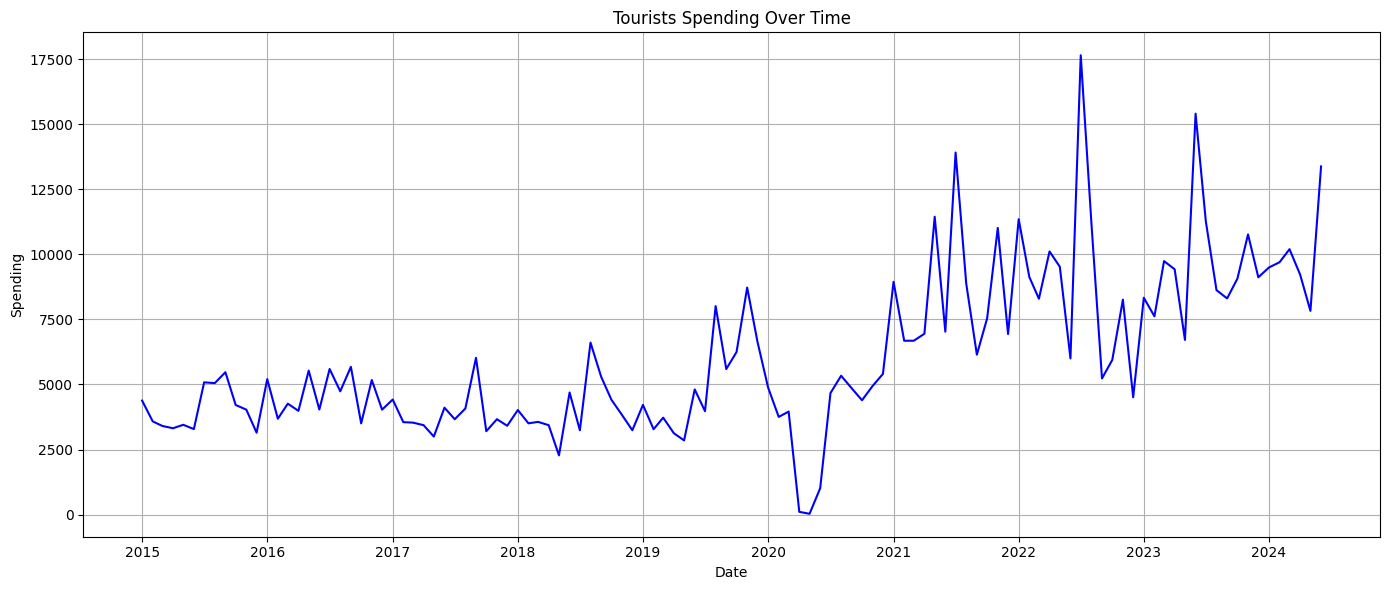

In [26]:
# Line plot to show how tourists' spending changes over time (wider version)
plt.figure(figsize=(14, 6)) 
plt.plot(df_d.index,spend_d, color='blue')
plt.title("Tourists Spending Over Time")
plt.xlabel("Date")
plt.ylabel("Spending")
plt.grid(True)
plt.tight_layout()
plt.show()


## statistical inference(D)

### Decomposition

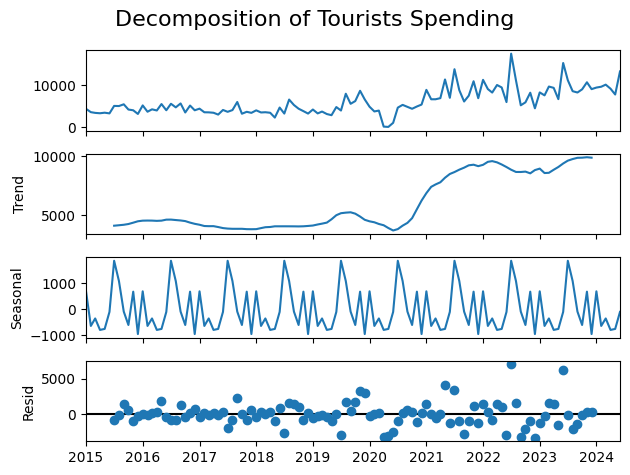

In [34]:
#Trend: Helps us see if there is a clear growth or decline in tourism over time.(2021-2023)
#Seasonality: Reveals peak and low months — for example, when tourist numbers or spending usually rise or fall.(Yes)
#Residual: Shows unusual or unexpected spending that cannot be explained by trend or seasonality.

# Apply decomposition
result = seasonal_decompose(spend_d, model='additive', period=12)

# Plot the decomposition
result.plot()
plt.suptitle("Decomposition of Tourists Spending", fontsize=16)
plt.tight_layout()
plt.show()


### Stationarity and ADF Test

In [39]:
# ADF Test checks if the time series is stationary.
# A high p-value (above 0.05) means the series is not stationary.
# This means we need to transform the data (differencing) before using forecasting models like ARIMA or SARIMA.

result_spending = adfuller(spend_d.dropna())
print("ADF Statistic for Tourists Spending:", result_spending[0])
print("p-value:", result_spending[1])

#The time series Tourists Spending is (not stationary), so we cannot use ARIMA or SARIMA directly.


ADF Statistic for Tourists Spending: -0.569824899498879
p-value: 0.8776556364963102


## models

## inbound data  

In [8]:
# inbound data 
## read data file
df_i = pd.read_excel('raw_data/I_data.xlsx')

## crete date column and set it as index then drop the (yeaer month) columns
df_i['Date'] = pd.to_datetime(df_i['Year'].astype(str) + ' ' + df_i['Month'])
df_i.set_index('Date', inplace=True)
df_i.drop(columns=['Year', 'Month'], inplace=True)

## rename the column
df_i.rename(columns={'Tourists Number Overnight Visitors': 'number of visitor'}, inplace=True)
df_i.head(15)

/var/folders/kb/gc9pqtqx4lz2rj1xp776bfxm0000gn/T/ipykernel_67896/1171458926.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_i['Date'] = pd.to_datetime(df_i['Year'].astype(str) + ' ' + df_i['Month'])


,number of visitor,Overnight Stay,Tourists Spending,Average Length of Stay,Avergae Spending per Trip,Average Spending per Night,Religious,Leisure,Business,Visiting Friends and Relatives,...,Private,Other,Total,ACCOMMODATION SPEND in MILLION SAR,ENTERTAINMENT SPEND in MILLION SAR,FOOD SPENDS in MILLION SAR,LOCAL TRANSPORT SPENDS in MILLION SAR,SHOPPING SPEND in MILLION SAR,OTHER SPEND in MILLION SAR,TOTAL SPENDS in MILLION SAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2247.108716,22786.205665,8942.891117,10.140233,3979.732289,392.469516,1188.680957,269.830450,21.932781,476.286010,...,407.659934,59.423627,2247.108716,4178.0,402.0,906.0,1009.0,1592.0,856.0,8943.0
2015-02-01,1704.247343,18623.357319,8072.564954,10.927614,4736.733190,433.464537,1102.405861,174.080482,40.238499,242.360359,...,180.663330,32.145750,1704.247343,3755.0,281.0,946.0,1014.0,1433.0,643.0,8073.0
2015-03-01,1533.266267,14684.551872,6690.145796,9.577301,4363.329410,455.590736,978.101284,138.824224,35.979820,208.495550,...,188.291173,63.788260,1533.266267,3134.0,195.0,865.0,743.0,1172.0,581.0,6690.0
2015-04-01,1574.023954,16834.418142,6174.227602,10.695147,3922.575375,366.762162,911.930406,93.753138,11.399367,205.232784,...,378.944595,37.113298,1574.023954,3183.0,144.0,622.0,675.0,1174.0,377.0,6174.0
2015-05-01,1396.368298,12500.283679,5685.580226,8.951996,4071.690997,454.836096,589.122219,111.260754,179.006869,253.934684,...,334.912092,31.924759,1396.368298,2391.0,125.0,813.0,549.0,1421.0,386.0,5686.0
2015-06-01,1534.627768,15701.725333,7477.696371,10.231618,4872.645033,476.234058,702.359866,99.990621,289.395115,263.131877,...,275.683531,27.569749,1534.627768,3631.0,111.0,1001.0,814.0,1507.0,413.0,7478.0
2015-07-01,1348.413130,12010.469273,7810.646889,8.907114,5792.473180,650.319876,570.440297,113.681390,192.446542,247.916817,...,327.424717,41.411691,1348.413130,4295.0,95.0,862.0,742.0,1480.0,337.0,7811.0
2015-08-01,1056.139461,8584.093515,4712.065689,8.127803,4461.594198,548.929911,156.198031,112.954378,198.016218,380.927375,...,383.055939,22.748595,1056.139461,2224.0,78.0,593.0,550.0,997.0,270.0,4712.0
2015-09-01,2072.749827,35419.757825,10609.200955,17.088294,5118.418449,299.527767,1406.021824,135.075068,165.678505,202.228066,...,235.228414,165.166886,2072.749827,4929.0,61.0,1083.0,1037.0,2578.0,920.0,10609.0


In [9]:
# drop nan
df_i = df_i.dropna()
df_i

,number of visitor,Overnight Stay,Tourists Spending,Average Length of Stay,Avergae Spending per Trip,Average Spending per Night,Religious,Leisure,Business,Visiting Friends and Relatives,...,Private,Other,Total,ACCOMMODATION SPEND in MILLION SAR,ENTERTAINMENT SPEND in MILLION SAR,FOOD SPENDS in MILLION SAR,LOCAL TRANSPORT SPENDS in MILLION SAR,SHOPPING SPEND in MILLION SAR,OTHER SPEND in MILLION SAR,TOTAL SPENDS in MILLION SAR
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,2247.108716,22786.205665,8942.891117,10.140233,3979.732289,392.469516,1188.680957,269.830450,21.932781,476.286010,...,407.659934,59.423627,2247.108716,4178.000000,402.000000,906.000000,1009.000000,1592.000000,856.000000,8943.000000
2015-02-01,1704.247343,18623.357319,8072.564954,10.927614,4736.733190,433.464537,1102.405861,174.080482,40.238499,242.360359,...,180.663330,32.145750,1704.247343,3755.000000,281.000000,946.000000,1014.000000,1433.000000,643.000000,8073.000000
2015-03-01,1533.266267,14684.551872,6690.145796,9.577301,4363.329410,455.590736,978.101284,138.824224,35.979820,208.495550,...,188.291173,63.788260,1533.266267,3134.000000,195.000000,865.000000,743.000000,1172.000000,581.000000,6690.000000
2015-04-01,1574.023954,16834.418142,6174.227602,10.695147,3922.575375,366.762162,911.930406,93.753138,11.399367,205.232784,...,378.944595,37.113298,1574.023954,3183.000000,144.000000,622.000000,675.000000,1174.000000,377.000000,6174.000000
2015-05-01,1396.368298,12500.283679,5685.580226,8.951996,4071.690997,454.836096,589.122219,111.260754,179.006869,253.934684,...,334.912092,31.924759,1396.368298,2391.000000,125.000000,813.000000,549.000000,1421.000000,386.000000,5686.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-01,3108.638000,46882.170000,16241.064014,15.081257,5224.500000,346.420000,1376.117000,178.691000,738.194000,214.930000,...,59.306000,455.994000,3108.638000,5739.267758,655.542935,2176.370041,2535.067334,2526.143647,2608.672298,16241.064014
2024-03-01,3157.710000,57690.978000,18975.707303,18.269878,6009.330000,328.920000,1526.776000,161.054000,728.066000,146.725000,...,42.995000,538.480000,3157.710000,6845.947217,738.586055,2496.172800,2953.428735,2831.922531,3109.649968,18975.707303
2024-04-01,2051.354000,33134.167000,10609.632757,16.152340,5172.010000,320.200000,669.696000,120.669000,685.348000,117.133000,...,30.752000,419.175000,2051.354000,3352.574124,386.140162,1672.743388,1786.256664,1949.819698,1462.098717,10609.632757


In [10]:
visitor_num_i = pd.DataFrame(df_i['number of visitor'])
spend_i = pd.DataFrame(df_i['Tourists Spending'])
visitor_num_i

,number of visitor
Date,
2015-01-01,2247.108716
2015-02-01,1704.247343
2015-03-01,1533.266267
2015-04-01,1574.023954
2015-05-01,1396.368298
...,...
2024-02-01,3108.638000
2024-03-01,3157.710000
2024-04-01,2051.354000


## data visualizing

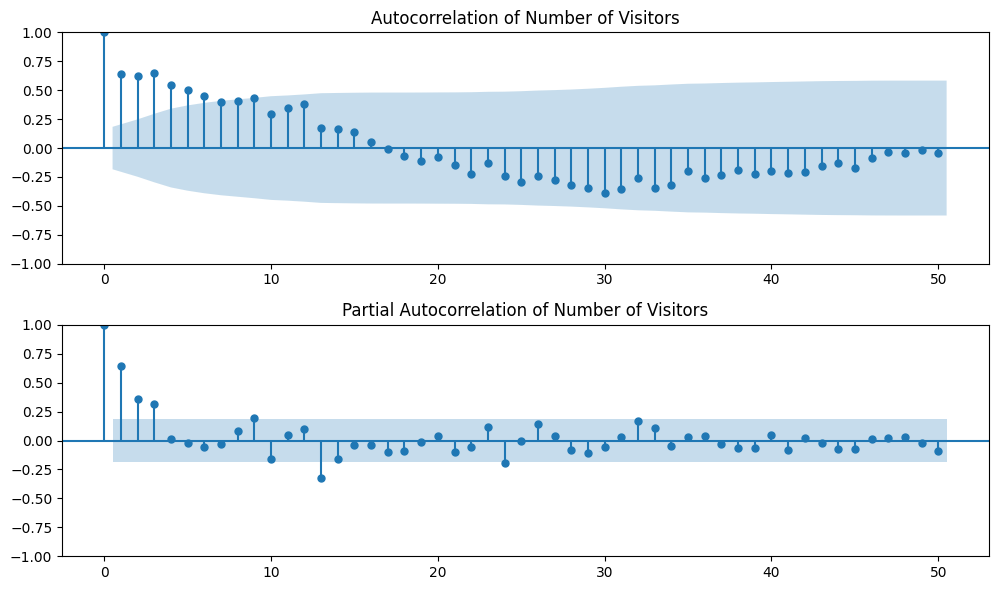

In [41]:
# ACF and PACF plots for the target variable "Number of Visitors" ( البيانات تحتوي على اعتماد زمني (time dependence)، وهي سمة مهمة في نماذج ARIMA.)
# These plots help us understand how current values are related to past values (lags)
# ACF shows overall correlations at different lags
# PACF shows the direct correlation at each lag, after removing effects of earlier lags

fig, ax = plt.subplots(2, 1, figsize=(10, 6))  

# Autocorrelation plot
plot_acf(visitor_num_i, lags=50, ax=ax[0])
ax[0].set_title("Autocorrelation of Number of Visitors")

# Partial Autocorrelation plot
plot_pacf(visitor_num_i, lags=50, ax=ax[1])
ax[1].set_title("Partial Autocorrelation of Number of Visitors")

plt.tight_layout()
plt.show()

#The data shows time dependency, meaning current values are influenced by previous ones.

<Figure size 1400x600 with 0 Axes>

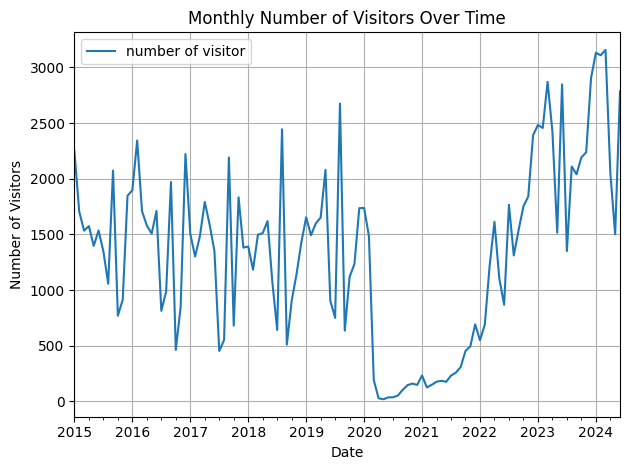

In [23]:
# Line Plot of Visitor Numbers over Time
plt.figure(figsize=(14, 6))  
visitor_num_i.plot()
plt.title("Monthly Number of Visitors Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Visitors")
plt.grid(True)
plt.tight_layout()
plt.show()

## statistical inference(I)

### Decomposition

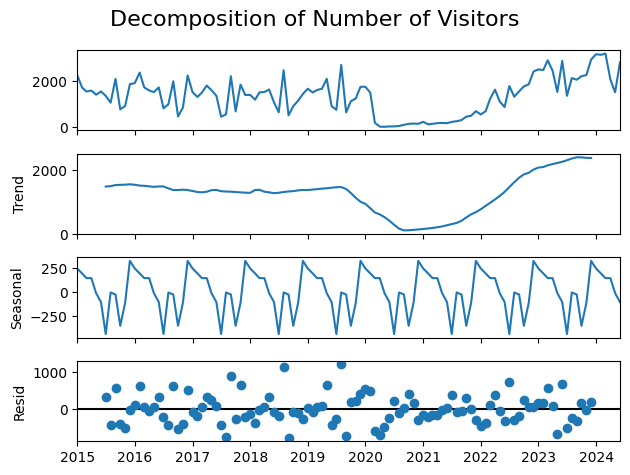

In [33]:
#Trend: shows the overall direction of the data over time.
#Seasonal: reveals repeating patterns ( monthly tourist behavior).
#Residual: shows what’s left after removing trend and seasonality (random noise).
visitor_num_i.index = pd.to_datetime(visitor_num_i.index)
decompose_result = seasonal_decompose(visitor_num_i, model='additive', period=12)
decompose_result.plot()
plt.suptitle("Decomposition of Number of Visitors", fontsize=16)
plt.tight_layout()
plt.show()


### Stationarity and ADF Test

In [38]:
# ADF Test checks if the time series is stationary.
# Since the p-value is high, the 'Number of Visitors' is not stationary.
# We need to apply differencing before building ARIMA or SARIMA models.

result_visitors = adfuller(visitor_num_d.dropna())
print("ADF Statistic for Number of Visitors:", result_visitors[0])
print("p-value:", result_visitors[1])

    ## Number of Visitors" is not stationary

ADF Statistic for Number of Visitors: -0.14244071157071259
p-value: 0.9450437435883299


## models